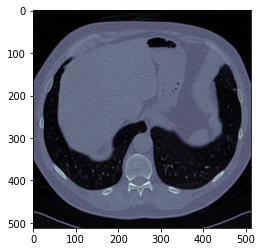

In [2]:
########################################################################################
# Part 1-1: Read in and print out all the data fields in a DICOM file (one slice) (5%) #
#     In this part, we go through every folders to get the image and print it out.     #
#      It will only show one image. If you want to see more, please comment break      #
########################################################################################

import numpy as np
import pydicom
import matplotlib.pyplot as plt
import os
import pdb

datadir = './CT_chest_scans'
folders = os.listdir(datadir)
for folder in folders:
    imagedir = os.path.join(datadir, folder)
    images = os.listdir(imagedir)
    for image in images:
        image_path = os.path.join(imagedir, image)
        pic = pydicom.dcmread(image_path)
        plt.imshow(pic.pixel_array, cmap=plt.cm.bone)
        plt.show()
        break
    break

In [1]:
#########################################################################################################
# Part 1-2: Read in the raw data for a CT slice and convert its pixel values into Hounsfield units.     #
# Compute the max, min, mean and standard deviation of both images (raw data and Hounsfield units) (5%) #
#    In this part, we convert pixel value of the CT image into Hounsfield units using this equation     #
#                Hounsfield units = (Rescale Slope * Pixel Value) + Rescale Intercept                   #
#########################################################################################################

import numpy as np
import pydicom
import matplotlib.pyplot as plt
import os
import pdb

datadir = './CT_chest_scans'
ct_pixel = []
ct_hounsfield = []
folders = os.listdir(datadir)
for folder in folders:
    imagedir = os.path.join(datadir, folder)
    images = os.listdir(imagedir)
    for image in images:
        image_path = os.path.join(imagedir, image)
        pic = pydicom.dcmread(image_path)
        pixel_value = np.clip(pic.pixel_array, 0, 255)
        ct_pixel.append(pixel_value)
        rescale_intercept = pic[0x0028, 0x1052].value
        rescale_slope = pic[0x0028, 0x1053].value
        hounsfield_units = (rescale_slope * pixel_value) + rescale_intercept
        ct_hounsfield.append(hounsfield_units)
print("Maximum of raw data pixels =", np.amax(ct_pixel))
print("Minimum of raw data pixels =", np.amin(ct_pixel))
print("Mean of raw data pixels =", np.mean(ct_pixel))
print("Standard deviation of raw data pixels =", np.std(ct_pixel))
print("Maximum of Hounsfield units =", np.amax(ct_hounsfield))
print("Minimum of Hounsfield units =", np.amin(ct_hounsfield))
print("Mean of Hounsfield units =", np.mean(ct_hounsfield))
print("Standard deviation of Hounsfield units =", np.std(ct_hounsfield))

Maximum of raw data pixels = 255
Minimum of raw data pixels = 0
Mean of raw data pixels = 144.06127640303973
Standard deviation of raw data pixels = 111.19294218773159
Maximum of Hounsfield units = 255.0
Minimum of Hounsfield units = -1024.0
Mean of Hounsfield units = -817.1462707667716
Standard deviation of Hounsfield units = 240.6105942529713


In [ ]:
##################################################################################################################################
# Part 2-1: Now we want to read in a 3D volume. (DICOM files in a folder)                                                        #
# Note that you will need to sort all the slices to make it into correct order. Please explain how do you sort the slices. (10%) #
##################################################################################################################################

# I get the pixel value of the picture and instance number at the same time,
# then make them into a dictionary. Use instance number as key,  pixel value
# as pair, so that I can sort the key value pairs with order.

ERROR! Session/line number was not unique in database. History logging moved to new session 59


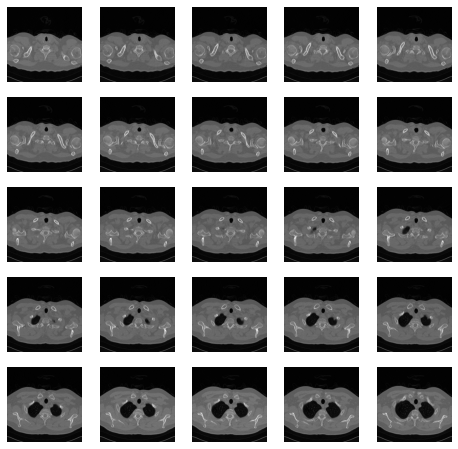

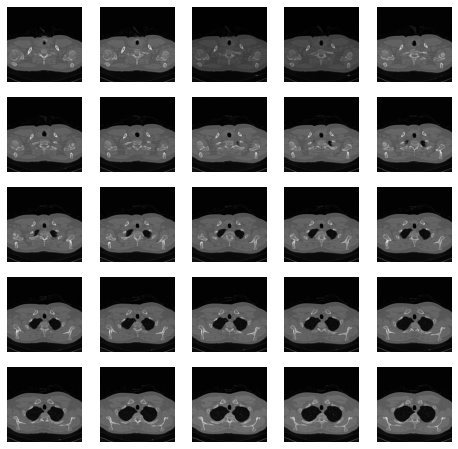

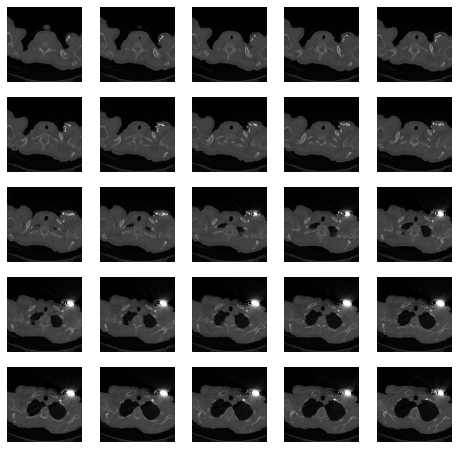

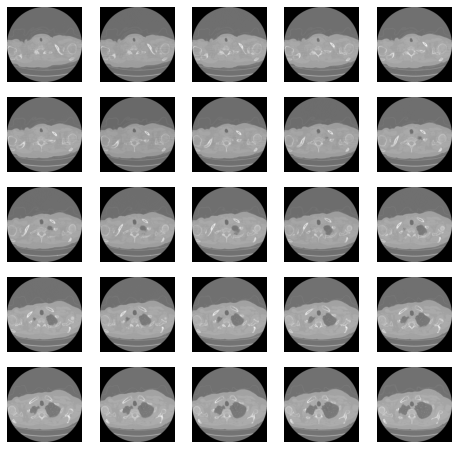

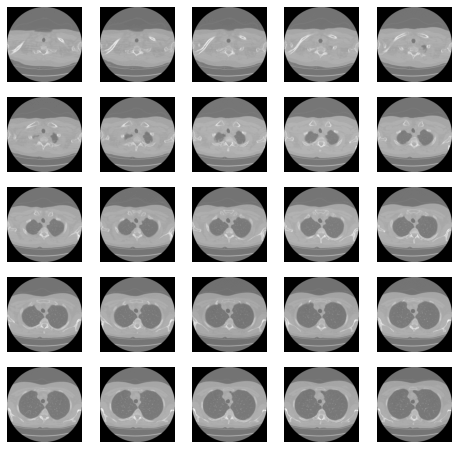

KeyboardInterrupt: 

In [2]:
###################################################################################################################################################
# Part 2-2: Normalize all the pixel from Hounsfield Units to float32 type number between 0.0 to 1.0 and display 25 slices in correct order. (10%) #
#       Hounsfield Units is a scale from black to white of 4096 values (12 bit) and ranges from -1024 HU to 3071 HU (zero is also a value)        #
###################################################################################################################################################

import numpy as np
import pydicom
import matplotlib.pyplot as plt
import skimage
import os
import pdb

def get_hu(pic):
    pixel_value = np.clip(pic.pixel_array, 0, 255)
    rescale_intercept = pic[0x0028, 0x1052].value
    rescale_slope = pic[0x0028, 0x1053].value
    hounsfield_units = (rescale_slope * pixel_value) + rescale_intercept
    nor_hu = normalize_hu(hounsfield_units)

    return nor_hu

def normalize_hu(hounsfield_units):
    nor_hu = np.array([(x+1024) / 4096 for x in hounsfield_units])

    return np.float32(nor_hu)

datadir = './CT_chest_scans'

folders = os.listdir(datadir)
for folder in folders:
    imagedir = os.path.join(datadir, folder)
    images = os.listdir(imagedir)
    data = {}
    for image in images:
        image_path = os.path.join(imagedir, image)
        pic = pydicom.dcmread(image_path)
        hounsfield_units = get_hu(pic)
        data[pic.InstanceNumber] = (hounsfield_units, pic.pixel_array)
    volume = []
    for ins in sorted(data):
        volume.append(data[ins])
    fig=plt.figure(figsize=(8, 8))
    columns = 5
    rows = 5

    for i in range(5):
        for j in range(5):
            fig.add_subplot(rows, columns, i * 5 + j + 1)
            plt.imshow(volume[i * 5 + j][1], cmap='gray')
            plt.axis('off')
    plt.show()
        
